# 4(a) What computational advantage does Equation 2 have over Equation 1?

In [1]:
import random

In [2]:
def generate_random_numbers(amount):
    return [random.random() for i in range(amount)]
random_numbers = generate_random_numbers(1000)

In [3]:
print(random_numbers)

[0.6627462683618417, 0.8867146831671479, 0.27250227309888575, 0.04174434741452426, 0.45183955070482007, 0.9116513469480778, 0.9285686498349791, 0.683330586701091, 0.20650915341104215, 0.5742747526362326, 0.18447621881780096, 0.5693613857246802, 0.13376353986892153, 0.670584619451392, 0.04192209347316089, 0.2353146855731958, 0.026029766129641363, 0.5490017331372365, 0.901627246342163, 0.8246601304208869, 0.3351906005547217, 0.679896669766001, 0.15339945866968896, 0.7875454163887894, 0.8762093264058474, 0.302399123911125, 0.5883768328532609, 0.1468375192856266, 0.8473809199868724, 0.07151197922959873, 0.4910311230686244, 0.550990605118801, 0.11496843753262365, 0.9161857679456452, 0.9102086021744141, 0.4449798522605103, 0.15005372869289746, 0.8020426739768023, 0.6624997276184983, 0.12252124008320397, 0.4701600805671776, 0.058209413514112796, 0.9722550883537342, 0.7690437509190747, 0.7088576453873567, 0.10819676723439098, 0.4525105181208955, 0.29457349175796865, 0.23666446306308075, 0.9830

In [4]:
def compute_product_array(numbers):
    product = 1
    for i in numbers:
        product *= i
    return product
product_random = compute_product_array(random_numbers)

In [5]:
print(f'The product of 1000 random numbers between 0 and 1 is {product_random}')

The product of 1000 random numbers between 0 and 1 is 0.0


# 4(b) Write code to train a logistic regression model with stochastic gradient descent (SGD). Plot the log-likelihood of the training data given by your model at every 100 iterations.

In [6]:
import pandas as pd 
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [30]:
df = pd.read_csv("./HW3_data/4/diabetes_train.csv", header = None)
df.rename(columns={0: 'y'}, inplace=True)
for i in range(1,21):
    df.rename(columns={i: 'x{}'.format(i)}, inplace=True)
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-1.0,0.54,0.68,0.65,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.0,0.74,1.59,1.18,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.25,0.88,0.59,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.0,0.28,1.80,1.17,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.39,1.35,0.55,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [40]:
def calculate_grad(x, y, weight):
    num = -1 * y * x.T
    den = 1 + math.exp(y * np.dot(x, weight))
    return (num/den).reshape(-1, 1)

def compute_log_likelihood(weight, df=df):
    df_x = df.iloc[:, 1:]
    # x = np.array(df['x'])
    x = np.array(df_x)
    y = np.array(df['y'])
    x = np.c_[x, np.ones(len(df))]
    log_likelihood = 0
    for i in range(len(x)):
        log_likelihood += math.log((math.exp(y[i] * np.dot(x[i], weight)))/(1 + math.exp(y[i] * np.dot(x[i], weight))), 10)
    return log_likelihood

In [41]:
def stochastic_gradient_descent_get_weight(learning_rate=0.1, iterations=10000, df=df):
    random.seed(1)
    weight_gradient_descent = np.zeros(21)
    df_x = df.iloc[:, 1:]
    # Add the column of 1s to the x matrix
    x = np.array(df_x)
    y = np.array(df['y'])
    x = np.c_[x, np.ones(len(df))]
    weight_gradient_descent = np.zeros((x.shape[1], 1))
    # Reference So that when loss decreases we can override the weight
    # log_likelihood_reference = -1 *float('inf')
    weights = []
    losses = []
    iterations_count = 0
    while iterations_count != iterations:
        point = random.randint(0, len(df)-1)
        # compute delta
        delta = calculate_grad(x[point], y[point], weight_gradient_descent)
        weight_gradient_descent -= learning_rate * delta
        log_likelihood = compute_log_likelihood(weight_gradient_descent, df)
#         if log_likelihood > log_likelihood_reference:
#             log_likelihood_reference = log_likelihood
#             final_weight_gradient_descent = weight_gradient_descent
        iterations_count += 1
        if iterations_count % 100 == 0:
            print('This is saved weight {} of 100'.format(int(iterations_count/100)))
            # saved_weights = copy.deepcopy(final_weight_gradient_descent)
            saved_weights = copy.deepcopy(weight_gradient_descent)
            weights.append(saved_weights)
            losses.append(log_likelihood)
    return weights, losses
weights, losses = stochastic_gradient_descent_get_weight()
print('The weights per 100 iterations is \n{}'.format(weights))

This is saved weight 1 of 100
This is saved weight 2 of 100
This is saved weight 3 of 100
This is saved weight 4 of 100
This is saved weight 5 of 100
This is saved weight 6 of 100
This is saved weight 7 of 100
This is saved weight 8 of 100
This is saved weight 9 of 100
This is saved weight 10 of 100
This is saved weight 11 of 100
This is saved weight 12 of 100
This is saved weight 13 of 100
This is saved weight 14 of 100
This is saved weight 15 of 100
This is saved weight 16 of 100
This is saved weight 17 of 100
This is saved weight 18 of 100
This is saved weight 19 of 100
This is saved weight 20 of 100
This is saved weight 21 of 100
This is saved weight 22 of 100
This is saved weight 23 of 100
This is saved weight 24 of 100
This is saved weight 25 of 100
This is saved weight 26 of 100
This is saved weight 27 of 100
This is saved weight 28 of 100
This is saved weight 29 of 100
This is saved weight 30 of 100
This is saved weight 31 of 100
This is saved weight 32 of 100
This is saved wei

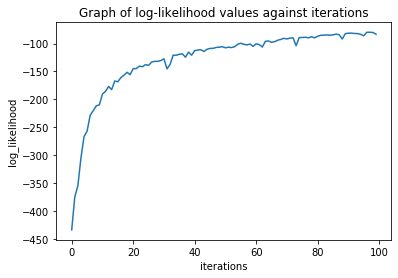

In [45]:
plt.plot(range(len(losses)), losses)
plt.xlabel('iterations')
plt.ylabel('log_likelihood')
plt.title('Graph of log-likelihood values against iterations')
plt.show()

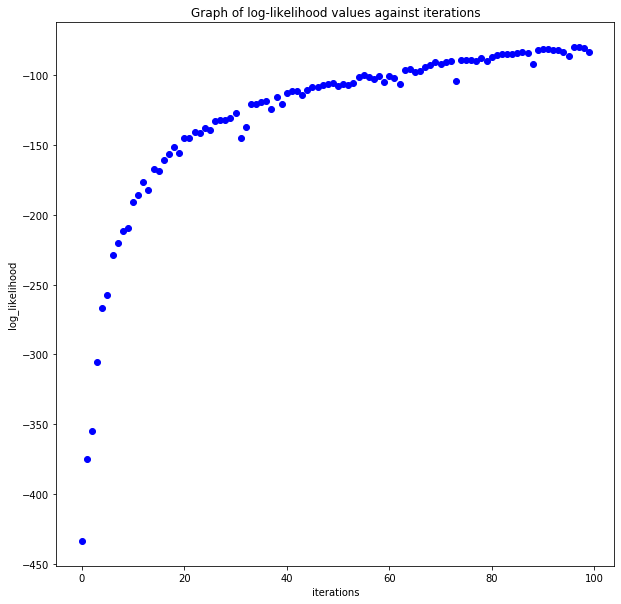

In [43]:
def plot_label_prediction(losses):
    df_result = pd.DataFrame()
    df_result['log_likelihood'] = losses 
    plt.figure(figsize=(10,10))
    plt.scatter(x=range(len(losses)), y=df_result['log_likelihood'], color='b')
    plt.xlabel('iterations')
    plt.ylabel('log_likelihood')
#     blue_patch = mpatches.Patch(color='blue', label='Loglikelihood values')
#     plt.legend(handles=[blue_patch])
    plt.title('Graph of log-likelihood values against iterations')
    plt.show()

plot_label_prediction(losses)